# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# (실습준비) 데이터 불러오기부터

In [12]:
import pandas as pd

# 학습/평가 데이터 로딩
train_x = pd.read_csv("train_x.csv")
train_y = pd.read_csv("train_y.csv")
test_x = pd.read_csv("test_x.csv")
test_y = pd.read_csv("test_y.csv")

In [13]:
train_x

,1d,7d
0,31385.6529,31535.2200
1,31403.0169,31188.9174
2,31549.9889,31240.4974
3,31738.8546,31442.4314
4,32380.1733,31922.7751
...,...,...
43339,33928.2051,33980.5909
43340,33712.5348,33047.1323
43341,32144.4917,32033.9452
43342,32137.7017,31659.1453


In [14]:
train_y.shape

(43344, 1)

In [15]:
test_x

,1d,7d
0,32216.8776,30509.7386
1,32646.5044,30759.5067
2,33067.5077,31048.8787
3,33134.7684,31076.1092
4,33960.5255,31714.9309
...,...,...
4171,31689.8212,32368.9760
4172,30425.9054,30551.3557
4173,30352.8869,29836.6983
4174,30232.2846,30643.8556


In [16]:
train_x = train_x.values
train_y = train_y.values
test_x = test_x.values
test_y = test_y.values

---

# 1. Machine Learning
## 이제 모델링을 해봅시다!
+ KeyPoint : 머신러닝 라이브러리를 토대로 모델링을 할 수 있다.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

### 가. LinearRegression 부터 시작해봅시다.

#### [실습문제1] 머신러닝_1
* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [18]:
# 아래에 실습코드를 작성하세요.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from math import sqrt

LR_reg = LinearRegression()
LR_reg.fit(train_x, train_y)

LinearRegression()

In [19]:
# Test 데이터로 성능을 평가해보세요.

y_pred_LR = LR_reg.predict(test_x)

print('LinearRegression')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_LR)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_LR))))
print("r2 : ", r2(test_y,y_pred_LR))

LinearRegression
Mean Squared Error : 3270402.95091
Root Mean Squared Error : 1808.42554
r2 :  0.7433398998593388


In [20]:
y_pred_LR

array([[31352.85723294],
       [31666.63090362],
       [32000.08584859],
       ...,
       [30230.59690821],
       [30653.32597968],
       [31574.24480822]])

In [22]:
test_y

array([[32163.4956],
       [32375.9407],
       [32817.7526],
       ...,
       [30923.2923],
       [30509.5463],
       [31184.8763]])

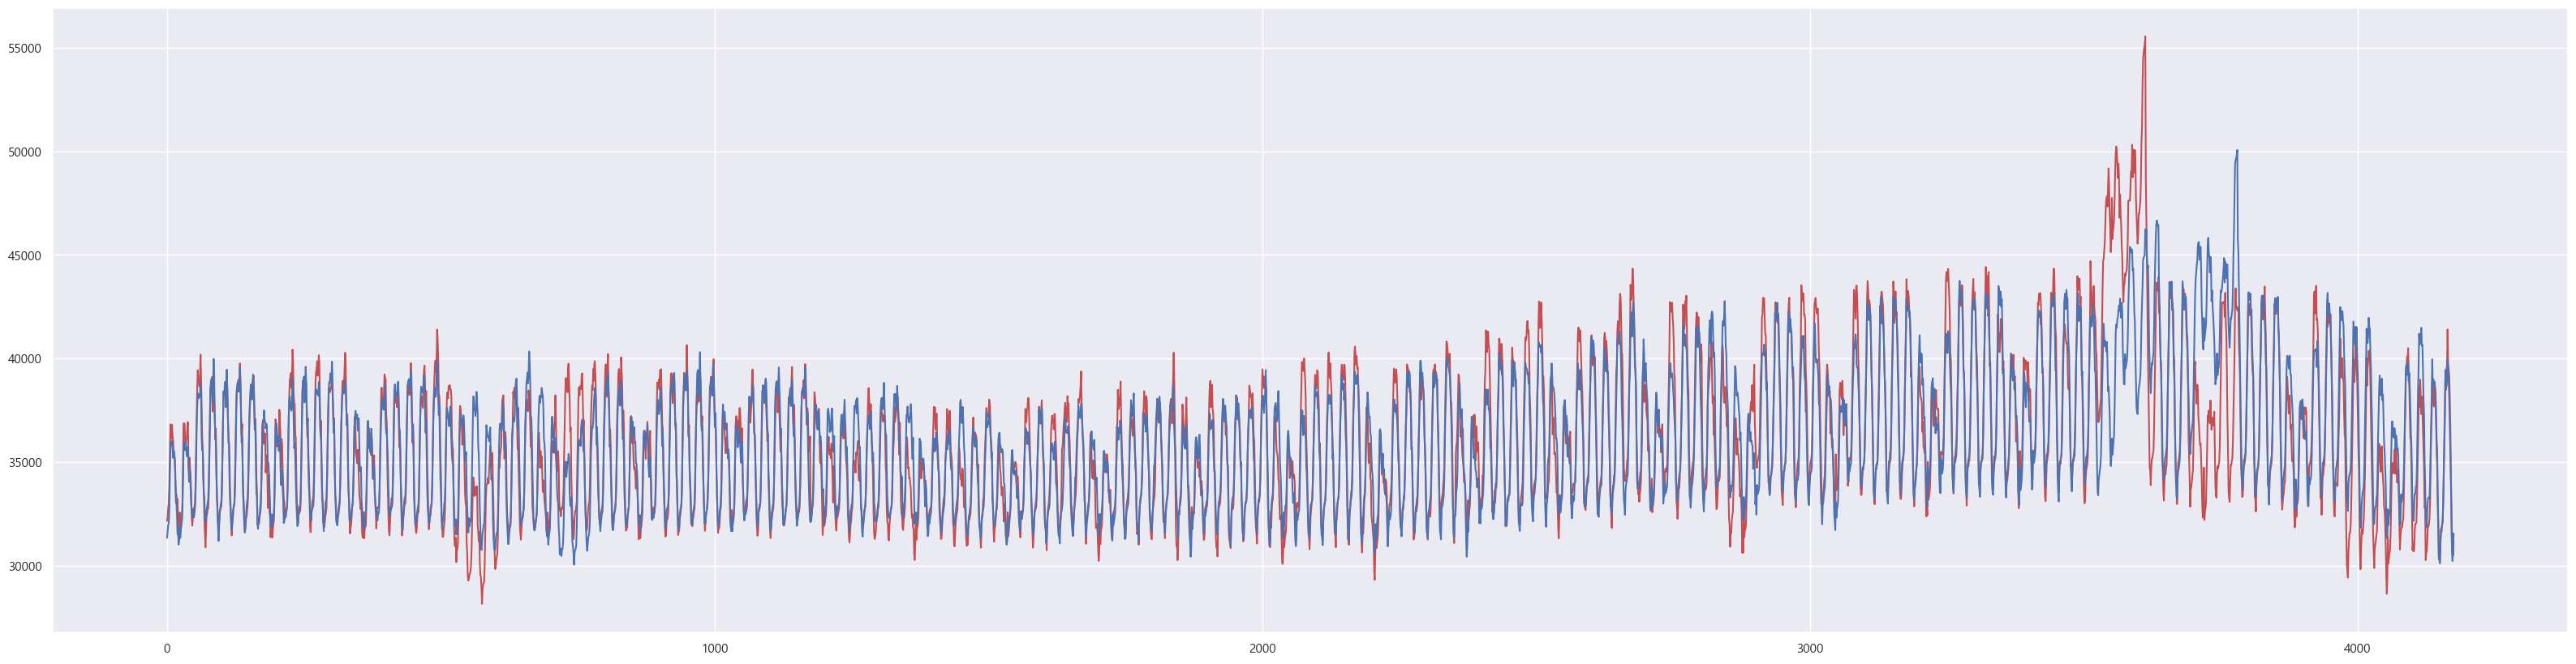

In [7]:
# 아래에 실습코드를 작성하세요.

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_LR)

### 나. 다음은 앙상블 기법을 토대로 랜덤포레스트와 그라디언부스팅을 활용해봅시다.

#### 1) 렌덤포레스트
##### 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법이라고 할 수 있다.

#### [실습문제2] 머신러닝_2
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [8]:
# 아래에 실습코드를 작성하세요.

from sklearn.ensemble import RandomForestRegressor as RFR

RFR_reg = RFR()
RFR_reg.fit(train_x, train_y)

C:\Users\김종한\AppData\Local\Temp\ipykernel_18540\4150206231.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR_reg.fit(train_x, train_y)


RandomForestRegressor()

In [9]:
# # Importing the libraries
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score

# # Feature Scaling
# sc = StandardScaler()
# X_train = sc.fit_transform(train_x)
# X_test = sc.transform(test_x)

# RFR_reg = GaussianNB()
# RFR_reg.fit(X_train, train_y)

In [11]:
# Test 데이터로 성능을 평가해보세요.

y_pred_RFR = RFR_reg.predict(test_x)

print('RandomForestRegressor')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_RFR)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_RFR))))
print("r2 : ", r2(test_y,y_pred_RFR))


RandomForestRegressor
Mean Squared Error : 3755302.09738
Root Mean Squared Error : 1937.86019
r2 :  0.7052851814171615


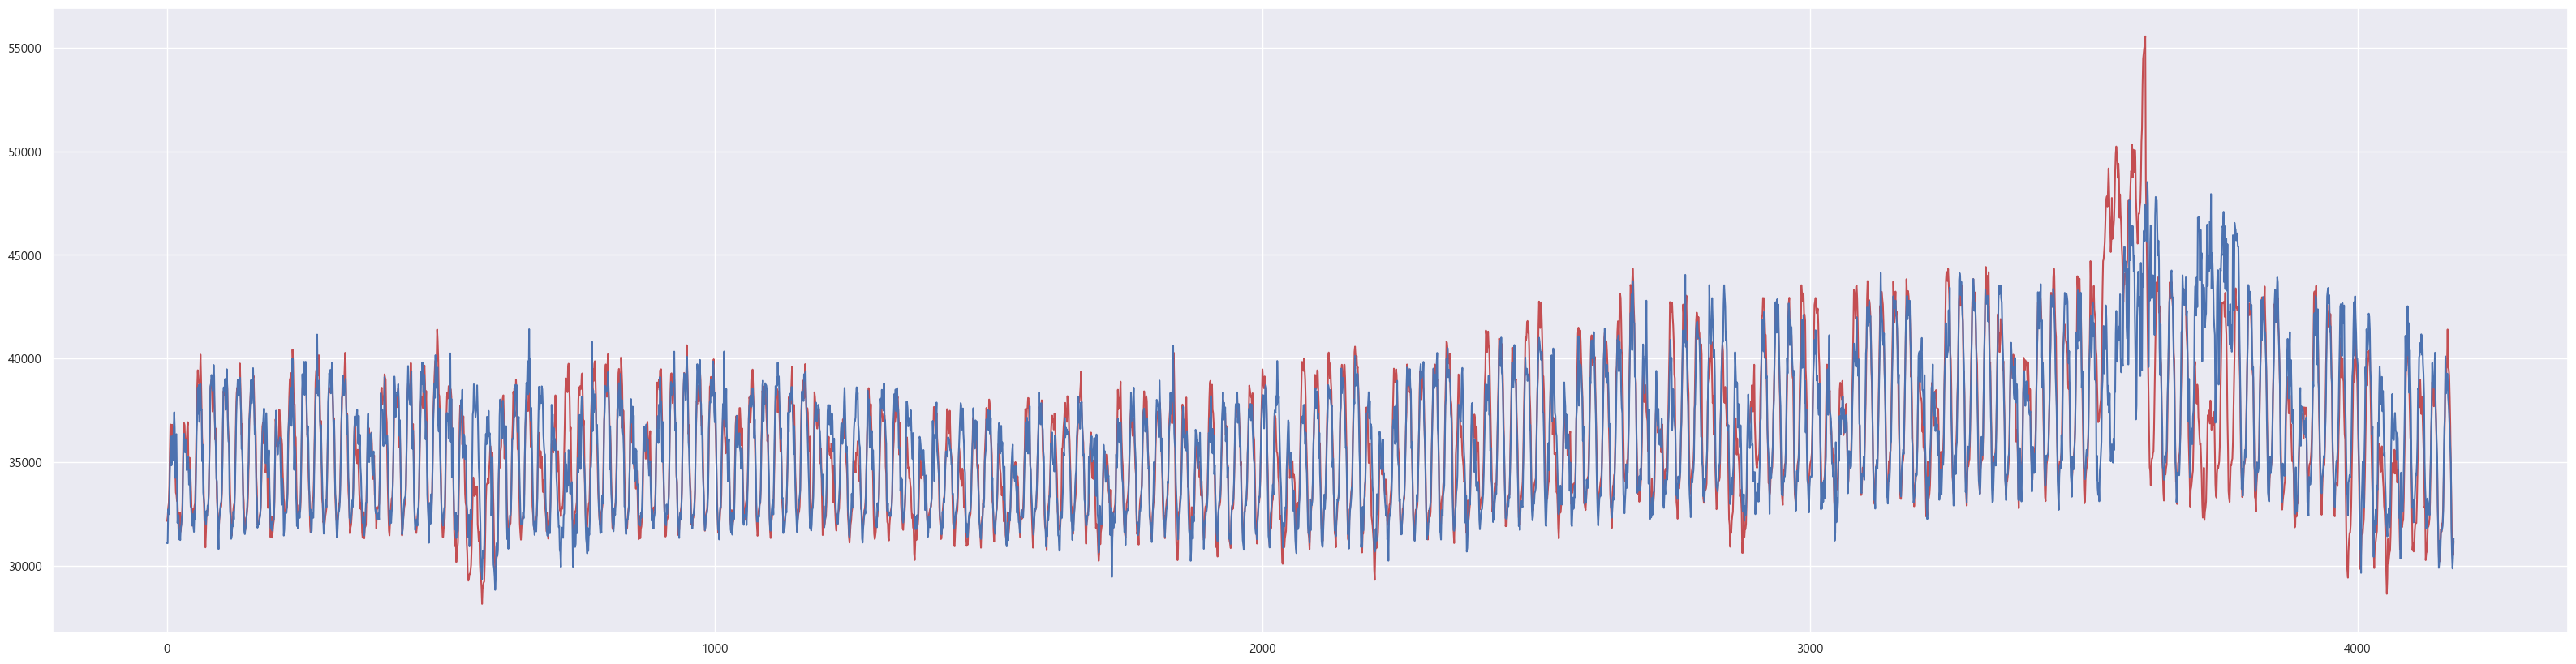

In [12]:
# 아래에 실습코드를 작성하세요.

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_RFR)

In [14]:
# Feature의 중요도 확인

feature_names = [f"feature {i}" for i in range(train_x.shape[1])]
rfr_importances = RFR_reg.feature_importances_
forest_importances = pd.Series(rfr_importances, index = feature_names)
forest_importances

feature 0    0.205137
feature 1    0.794863
dtype: float64

In [15]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 2) GradientBoosting
##### 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법

#### [실습문제4] 머신러닝_4
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [16]:
# 아래에 실습코드를 작성하세요.

from sklearn.ensemble import GradientBoostingRegressor as GBR

gbr_reg = GBR()
gbr_reg.fit(train_x, train_y)


c:\users\김종한\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [17]:
# Test 데이터로 성능을 평가해보세요.

y_pred_gbr = gbr_reg.predict(test_x)

print('GradientBoostingRegressor')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_gbr)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_gbr))))
print("r2 : ", r2(test_y,y_pred_gbr))

GradientBoostingRegressor
Mean Squared Error : 3336140.17759
Root Mean Squared Error : 1826.51038
r2 :  0.7381808648914252


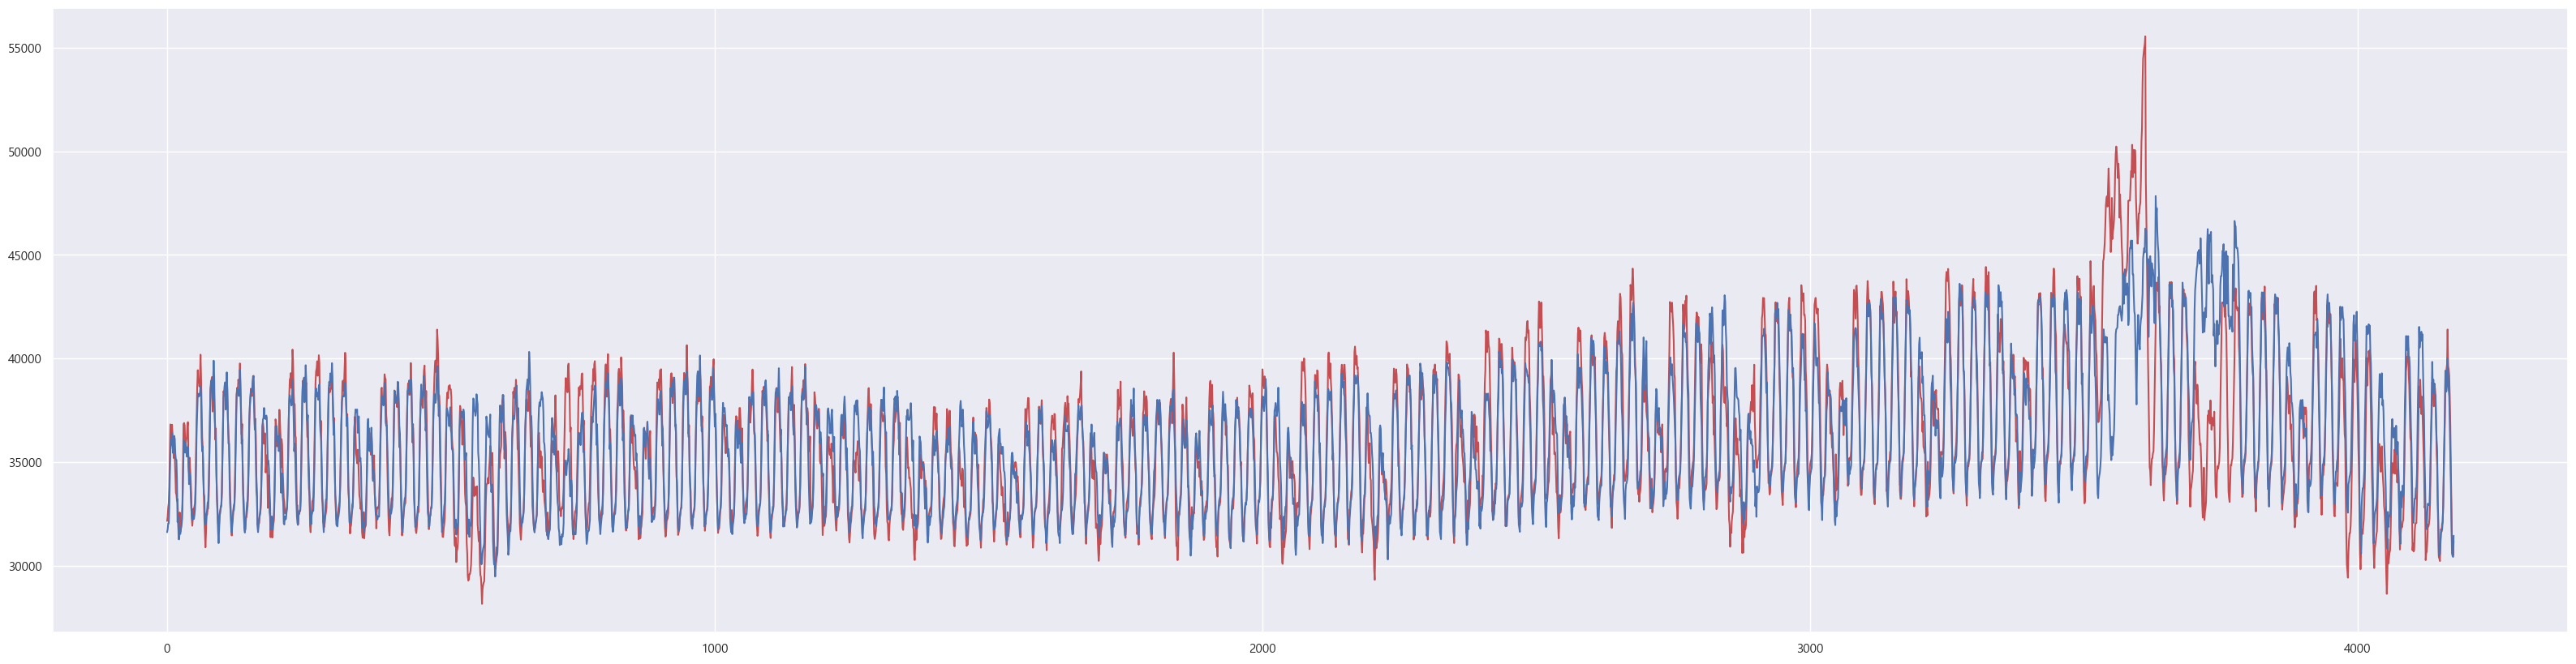

In [18]:
plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_gbr)

#### [실습문제5] 머신러닝_5
* 그라디언트부스팅으로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [19]:
# Feature의 중요도 확인

feature_names = [f"feature {i}" for i in range(train_x.shape[1])]
gbr_importances = gbr_reg.feature_importances_
gradient_importances = pd.Series(gbr_importances, index = feature_names)
gradient_importances



feature 0    0.200297
feature 1    0.799703
dtype: float64

In [20]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

### 3) Self Choice Model
##### 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.

#### [실습문제6] 머신러닝_6
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [21]:
# 아래에 실습코드를 작성하세요.

import xgboost

xgb_reg = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb_reg.fit(train_x, train_y)
y_pred_xgb = xgb_reg.predict(test_x)

In [22]:
# Test 데이터로 성능을 평가해보세요.

print('Xgboost')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_xgb)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_xgb))))
print("r2 : ", r2(test_y,y_pred_xgb))

Xgboost
Mean Squared Error : 3394860.05316
Root Mean Squared Error : 1842.51460
r2 :  0.733572549228307


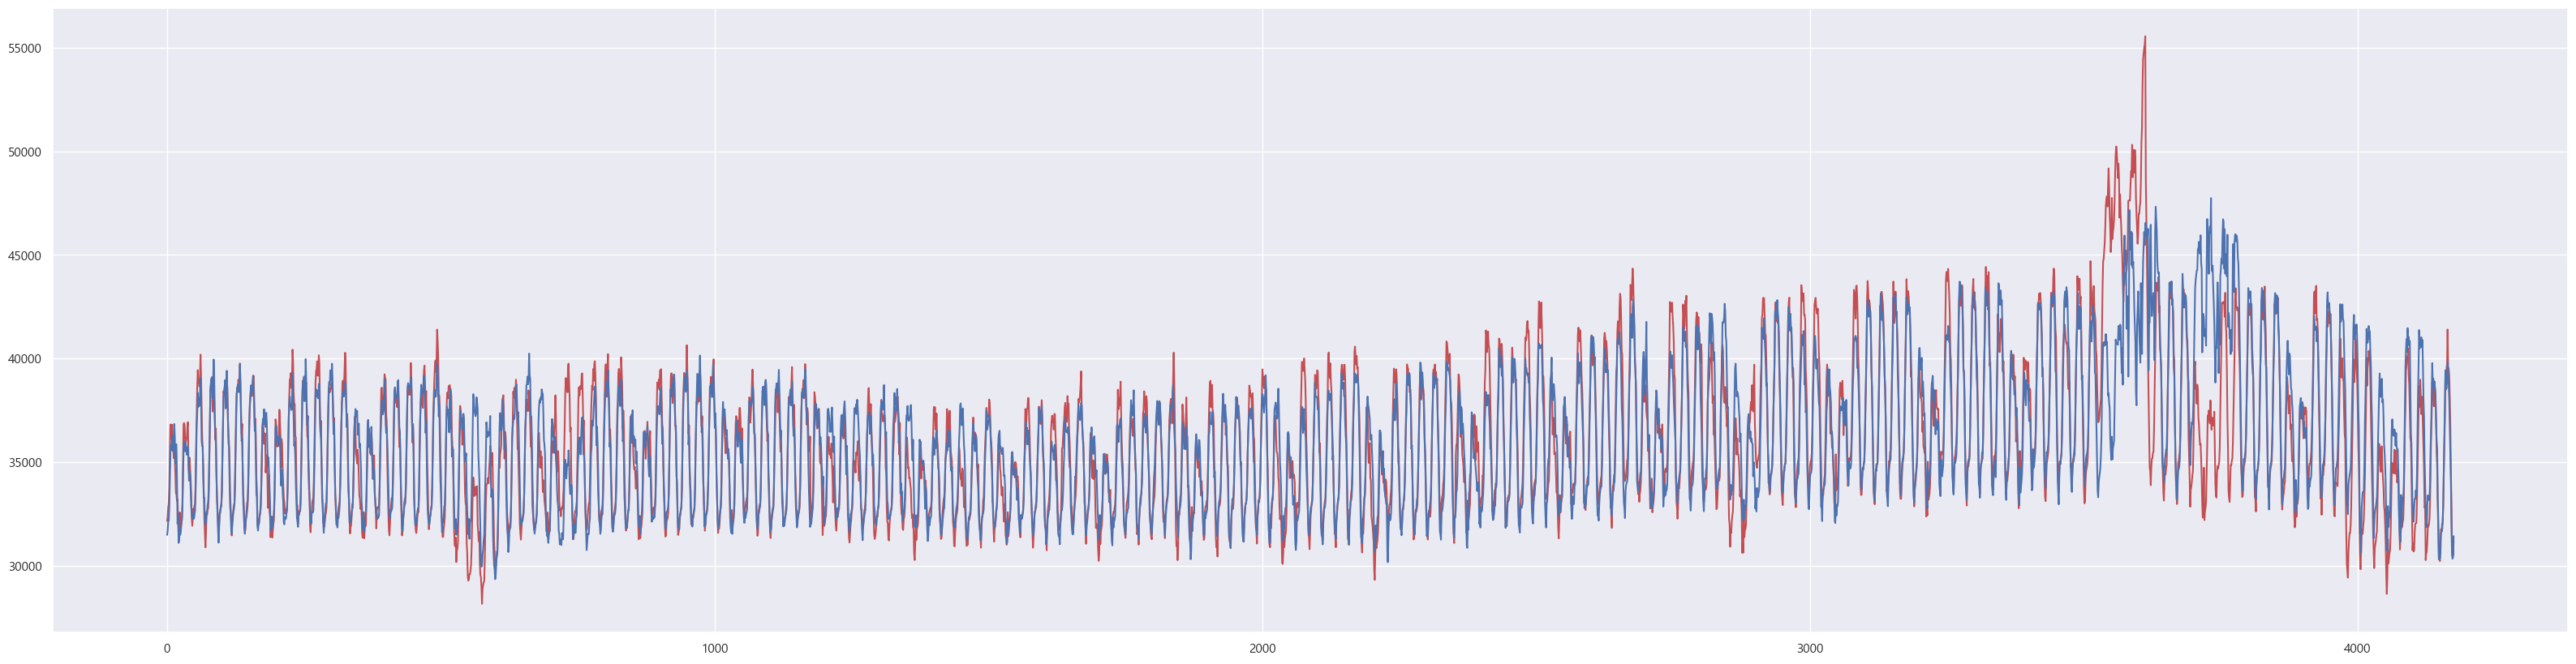

In [23]:
# 아래에 실습코드를 작성하세요.

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_xgb)

#### [실습문제7] 머신러닝_7
* Self Choice Model로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

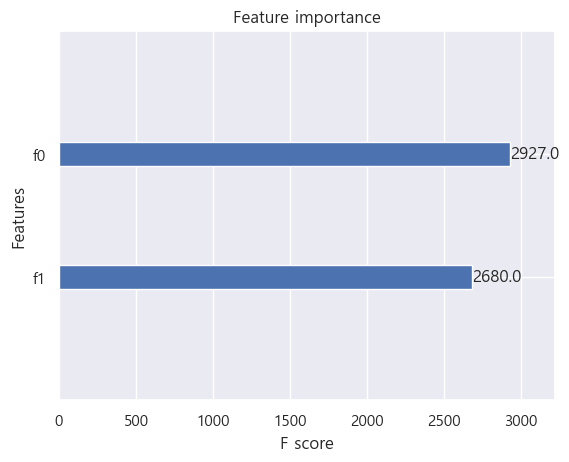

In [24]:
# Feature의 중요도 확인

xgboost.plot_importance(xgb_reg)



In [25]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### [실습문제8] 스케일링 test
* Min Max Scale 함수를 활용하여 스케일링 후 위 모델에 적용하여 보세요. 


In [26]:
# 아래에 실습코드를 작성하세요.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_x)
scaled_train_x = scaler.transform(train_x)

In [27]:
scaler.fit(test_x)
scaled_test_x = scaler.transform(test_x)

In [28]:
# 아래에 실습코드를 작성하세요.

scaled_train_x

array([[0.15538966, 0.16070305],
       [0.15600652, 0.14840061],
       [0.16122772, 0.150233  ],
       ...,
       [0.18234751, 0.17842033],
       [0.18210629, 0.16510552],
       [0.16446693, 0.18128672]])

In [29]:
LR_reg.fit(scaled_train_x, train_y)
scaled_y_pred_LR = LR_reg.predict(scaled_test_x)

In [30]:
print('scaled_LinearRegression')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,scaled_y_pred_LR)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,scaled_y_pred_LR))))
print("r2 : ", r2(test_y,scaled_y_pred_LR))

scaled_LinearRegression
Mean Squared Error : 4062798.12746
Root Mean Squared Error : 2015.63839
r2 :  0.6811529986068101


In [31]:
xgb_reg.fit(scaled_train_x, train_y)
scaled_y_pred_xgb = xgb_reg.predict(scaled_test_x)

In [32]:
print('scaled_Xgboost')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,scaled_y_pred_xgb)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,scaled_y_pred_xgb))))
print("r2 : ", r2(test_y,scaled_y_pred_xgb))

scaled_Xgboost
Mean Squared Error : 4103087.02674
Root Mean Squared Error : 2025.60782
r2 :  0.6779911396314153


# 2. Deep Learning 
## 이번엔 딥러닝 모델링을 해봅시다.

#### [실습문제9] 딥러닝_1
* tensorflow 라이브러리를 활용한 모델을 자유롭게 만들어보세요.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
model1 = tf.keras.models.Sequential([
    Dense(128, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1),])

model1.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [36]:
history1 = model1.fit(train_x, train_y, epochs= 5, validation_split=0.2)

Epoch 1/5
1084/1084 [==============================] - 3s 2ms/step - loss: 9948817.0000 - mse: 9948817.0000 - val_loss: 927218.8750 - val_mse: 927218.8750
Epoch 2/5
1084/1084 [==============================] - 2s 2ms/step - loss: 2655140.5000 - mse: 2655140.5000 - val_loss: 946563.0625 - val_mse: 946563.0625
Epoch 3/5
1084/1084 [==============================] - 3s 2ms/step - loss: 2736729.5000 - mse: 2736729.5000 - val_loss: 919921.3750 - val_mse: 919921.3750
Epoch 4/5
1084/1084 [==============================] - 2s 2ms/step - loss: 2717419.0000 - mse: 2717419.0000 - val_loss: 923715.8125 - val_mse: 923715.8125
Epoch 5/5
1084/1084 [==============================] - 2s 2ms/step - loss: 2736514.7500 - mse: 2736514.7500 - val_loss: 925163.6875 - val_mse: 925163.6875


In [37]:
y_pred_deep1 = model1.predict(test_x)

131/131 [==============================] - 0s 1ms/step


In [38]:
print('DEEP1')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_deep1)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_deep1))))
print("r2 : ", r2(test_y,y_pred_deep1))


DEEP1
Mean Squared Error : 3337317.97621
Root Mean Squared Error : 1826.83277
r2 :  0.7380884316607865


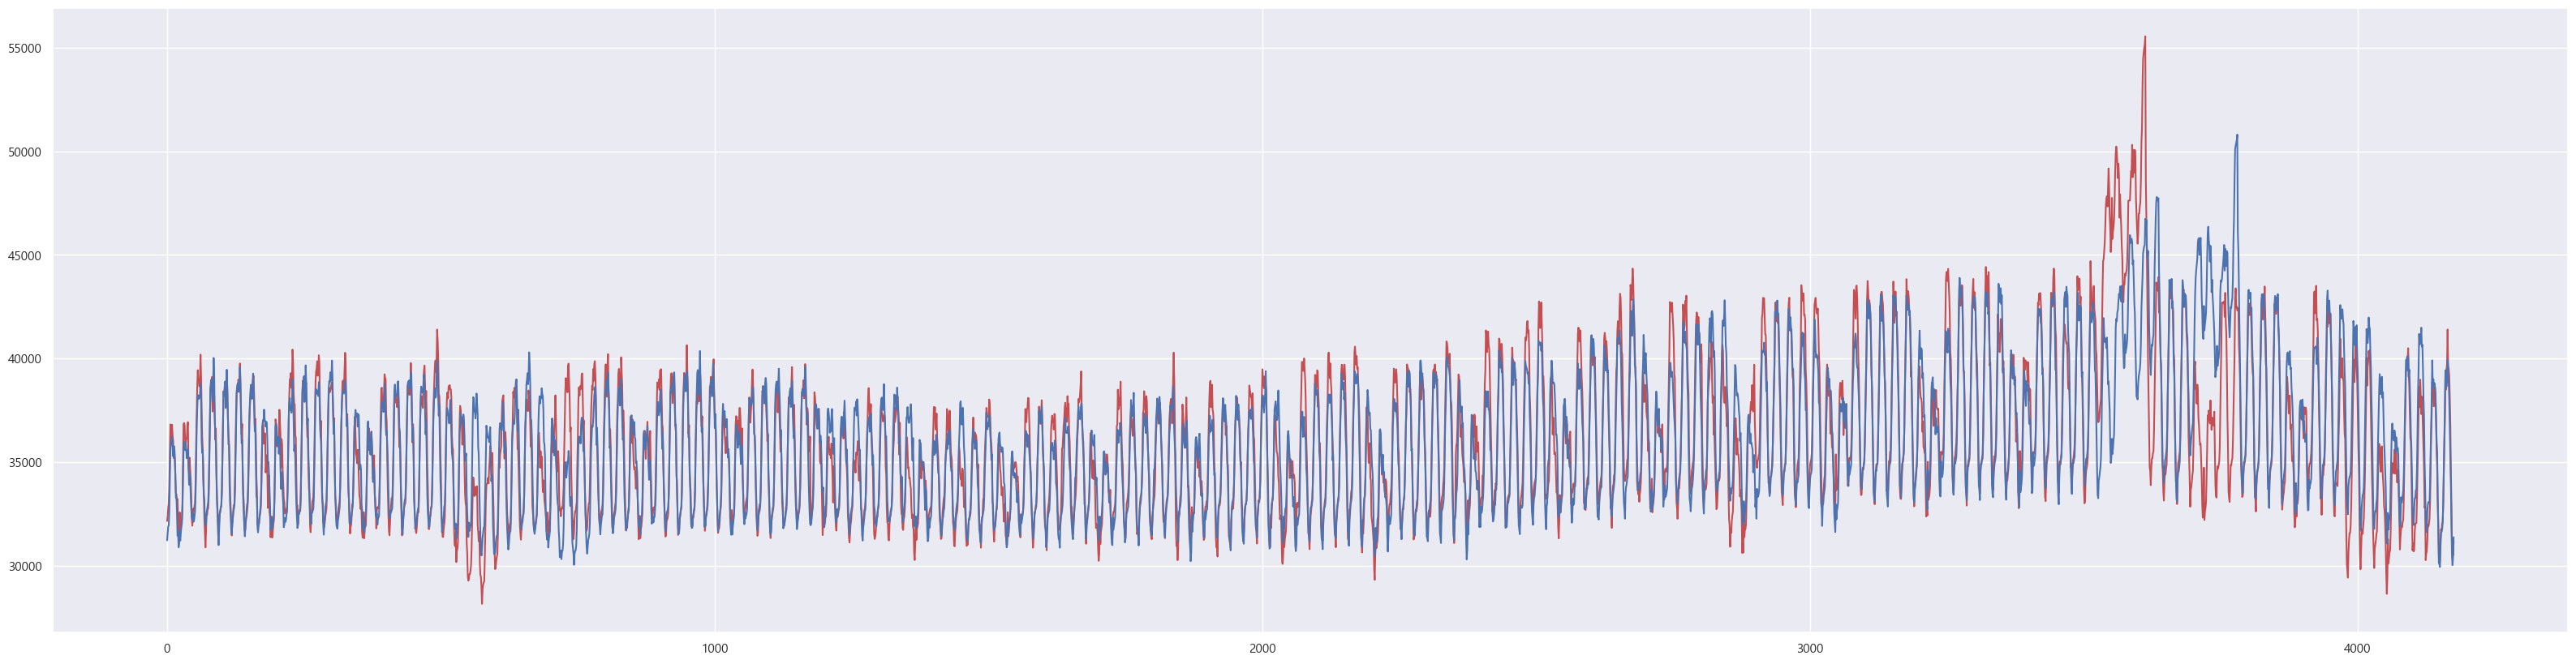

In [39]:

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_deep1)
